In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funcoesTermosol as ft
from APS import *

In [72]:
[nn,N,nm,Inc,nc,F,nr,R] = ft.importa('entrada.xls')
# nn = numero de nos
# N = matriz dos nos
# nm = numero de membros
# Inc = matriz de incidencia
# nc = numero de cargas
# F = vetor de carregamento
# nr = numero de restricoes
# R = vetor com os graus de liberdade restritos

In [73]:
def angulo(No1,No2):
    x_1= N[0][No1-1]
    y_1= N[1][No1-1]
    x_2= N[0][No2-1]
    y_2= N[1][No2-1]

    if x_2-x_1 == 0:
        if y_2-y_1 > 0:
            ang = 0.5*np.pi
        else:
            ang = 1.5*np.pi
    else:
        if x_2-x_1 > 0:
            ang = np.arctan((y_2-y_1)/(x_2-x_1))
        else:
            ang = np.pi + np.arctan((y_2-y_1)/(x_2-x_1))
    return ang

print(np.rad2deg(angulo(3,1)))

233.13010235415598


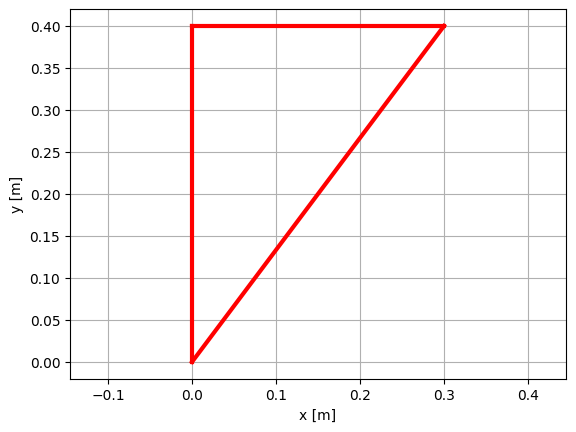

In [74]:
ft.plota(N,Inc)

In [75]:
print(Inc,"\n")
print(N,"\n")
print(R)

[[1.0e+00 2.0e+00 2.1e+11 2.0e-04]
 [2.0e+00 3.0e+00 2.1e+11 2.0e-04]
 [3.0e+00 1.0e+00 2.1e+11 2.0e-04]] 

[[0.  0.  0.3]
 [0.  0.4 0.4]] 

[[0.]
 [2.]
 [3.]]


In [76]:
ks =[]
dof_indices_list = []
for i in range(0,nm):
    dof_indices_list.append([int(Inc[i][0]),int(Inc[i][1])])
    [x_1,y_1]= N[:,int(Inc[i][0])-1]
    [x_2,y_2]= N[:,int(Inc[i][1])-1]
    l = np.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    k = Inc[i][2] * Inc[i][3] / l
    print(f"Elemento {i+1}")
    print(f"x1 = {x_1},y_1 = {y_1},x_2 = {x_2},y_2 = {y_2},l = {l}")
    print(f"EA/l = {k}")
    ang = angulo(int(Inc[i][0]),int(Inc[i][1]))
    c = np.cos(ang)
    s = np.sin(ang)

    M = np.array([[c**2,c*s,-c**2,-c*s],[c*s,s**2,-c*s,-s**2],[-c**2,-c*s,c**2,c*s],[-c*s,-s**2,c*s,s**2]]) 
    ke = np.multiply(k,M)
    ks.append(ke)
    print(ke.round(2) , "\n")


Elemento 1
x1 = 0.0,y_1 = 0.0,x_2 = 0.0,y_2 = 0.4,l = 0.4
EA/l = 105000000.0
[[ 0.00e+00  0.00e+00 -0.00e+00 -0.00e+00]
 [ 0.00e+00  1.05e+08 -0.00e+00 -1.05e+08]
 [-0.00e+00 -0.00e+00  0.00e+00  0.00e+00]
 [-0.00e+00 -1.05e+08  0.00e+00  1.05e+08]] 

Elemento 2
x1 = 0.0,y_1 = 0.4,x_2 = 0.3,y_2 = 0.4,l = 0.3
EA/l = 140000000.0
[[ 1.4e+08  0.0e+00 -1.4e+08 -0.0e+00]
 [ 0.0e+00  0.0e+00 -0.0e+00 -0.0e+00]
 [-1.4e+08 -0.0e+00  1.4e+08  0.0e+00]
 [-0.0e+00 -0.0e+00  0.0e+00  0.0e+00]] 

Elemento 3
x1 = 0.3,y_1 = 0.4,x_2 = 0.0,y_2 = 0.0,l = 0.5
EA/l = 84000000.0
[[ 30240000.  40320000. -30240000. -40320000.]
 [ 40320000.  53760000. -40320000. -53760000.]
 [-30240000. -40320000.  30240000.  40320000.]
 [-40320000. -53760000.  40320000.  53760000.]] 



In [77]:
global_stiffness_matrix = np.zeros((nm*2, nm*2))


dof_indices_list

for i in range (len(dof_indices_list)):
    dof1 = (dof_indices_list[i][0]-1)*2
    dof2 = (dof_indices_list[i][0]-1)*2+1
    dof3 = (dof_indices_list[i][1]-1)*2
    dof4 = (dof_indices_list[i][1]-1)*2+1

    global_stiffness_matrix[np.ix_([dof1,dof2,dof3,dof4],[dof1,dof2,dof3,dof4])] += ks[i]

print(global_stiffness_matrix.round(2))
global_stiffness_matrix_uncut = global_stiffness_matrix.copy()

[[ 3.0240e+07  4.0320e+07 -0.0000e+00 -0.0000e+00 -3.0240e+07 -4.0320e+07]
 [ 4.0320e+07  1.5876e+08 -0.0000e+00 -1.0500e+08 -4.0320e+07 -5.3760e+07]
 [-0.0000e+00 -0.0000e+00  1.4000e+08  0.0000e+00 -1.4000e+08  0.0000e+00]
 [-0.0000e+00 -1.0500e+08  0.0000e+00  1.0500e+08  0.0000e+00  0.0000e+00]
 [-3.0240e+07 -4.0320e+07 -1.4000e+08  0.0000e+00  1.7024e+08  4.0320e+07]
 [-4.0320e+07 -5.3760e+07  0.0000e+00  0.0000e+00  4.0320e+07  5.3760e+07]]


In [78]:
u = np.zeros((nn*2,1))
dropped = 0

for i in range (len(R)):
    global_stiffness_matrix = np.delete(global_stiffness_matrix, int(R[i][0])-dropped, 0)
    global_stiffness_matrix = np.delete(global_stiffness_matrix, int(R[i][0])-dropped, 1)
    u = np.delete(u, int(R[i][0]) - dropped, None)
    F = np.delete(F, int(R[i][0]) - dropped, None)
    dropped += 1
    

print(global_stiffness_matrix.round(2))
print(u)
print(F)

[[ 1.5876e+08 -4.0320e+07 -5.3760e+07]
 [-4.0320e+07  1.7024e+08  4.0320e+07]
 [-5.3760e+07  4.0320e+07  5.3760e+07]]
[0. 0. 0.]
[   0.  150. -100.]


In [79]:

print(F)

[   0.  150. -100.]


In [80]:
result_a,max_e,i = gauss_seidel_solver(100,0.0001,global_stiffness_matrix,F)
print(result_a)
print(f"Erro max = {max_e}")
print(f"Iterações : {i}")

[-9.52362073e-07  1.60712449e-06 -4.01782449e-06]
Erro max = 1.5869431441387516e-05
Iterações : 10


In [81]:
u_completo = np.zeros((nn*2,1))
count = 0
for i in range (nn*2):
    if i not in R:
        u_completo[i] = result_a[count]
        count += 1
        

print(u_completo)


[[ 0.00000000e+00]
 [-9.52362073e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.60712449e-06]
 [-4.01782449e-06]]


In [82]:
deform = []
tens = []

for el in range(nm):
    u_1 = int(Inc[el][0]-1)*2
    v_1 = int(Inc[el][0]-1)*2+1
    u_2 = int(Inc[el][1]-1)*2
    v_2 = int(Inc[el][1]-1)*2+1

    ang = angulo(int(Inc[el][0]),int(Inc[el][1]))
    c = np.cos(ang)
    s = np.sin(ang)
    [x_1,y_1]= N[:,int(Inc[el][0])-1]
    [x_2,y_2]= N[:,int(Inc[el][1])-1]
    l = np.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    e = np.dot(np.array([-c,-s,c,s]),np.array([u_completo[u_1],u_completo[v_1],u_completo[u_2],u_completo[v_2]]))
    e = np.multiply(e,1/l)
    deform.append(e[0])
    tens.append(Inc[el][2]*e[0])

print("deslocamentos")
print(u_completo,"\n")
print("deformações")
print(deform,"\n")
print("tensões")
print((tens),"\n")
print("forças")
Fi = tens*Inc[:,3]
print(Fi)
print("reacoes")
Reac_uncut = ((np.matmul(global_stiffness_matrix_uncut,u_completo)))
Reac =[]
for i in range (nn*2):
    if i in R:
        Reac.append(Reac_uncut[i][0])
        print(f"{Reac_uncut[i][0]}")
    

deslocamentos
[[ 0.00000000e+00]
 [-9.52362073e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.60712449e-06]
 [-4.01782449e-06]] 

deformações
[2.3809051819947297e-06, 5.357081646976166e-06, -2.976190476190476e-06] 

tensões
[499990.0882188932, 1124987.145864995, -624999.9999999999] 

forças
[  99.99801764  224.99742917 -125.        ]
reacoes
74.99999999999997
-224.99742917299898
99.99801764377865


In [83]:
ft.geraSaida("saidaTeste",Reac,u_completo,deform,Fi,tens)

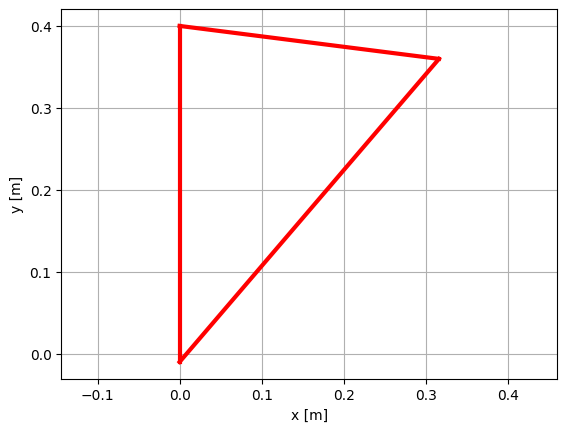

In [84]:
N2 = N.copy()
for i in range (nn):
    N2[0][i] += (u_completo[i*2][0])*10000
    N2[1][i] += (u_completo[i*2+1][0])*10000



ft.plota(N2,Inc)